# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

C:\Users\Dell\AppData\Local\Temp\ipykernel_13504\2094690104.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


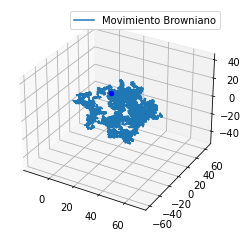

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

xyz = []
cur = [0, 0, 0]

# caminata de 10000 pasos (10 segundos, 1000 pasos por segundo)
for i in range(10000):
    axis = random.randrange(0, 3)
    cur[axis] += random.choice([-1, 1])
    xyz.append(cur[:])

# gráfica
x, y, z = zip(*xyz)
ax.plot(x, y, z, label='Movimiento Browniano')
ax.scatter(x[-1], y[-1], z[-1], c='b', marker='o') # punto final
ax.legend()
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

Text(0.5, 1.0, 'Apuesta arriesgada')

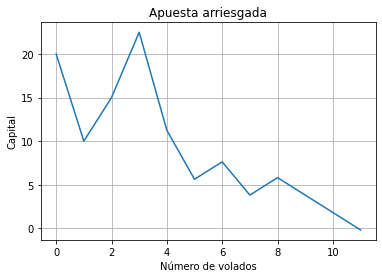

In [34]:
valor = 20
caminata = [valor]

# caminata aleatoria de la apuesta con un ciclo abierto
while valor > 0:
    if valor >= 6:
        valor = valor + random.choice([-valor/2,valor/2])
        caminata.append(valor)
    elif valor > 0 and valor < 6:
        valor = valor + random.choice([-2,2])
        caminata.append(valor)

# gráfica
plt.figure()
plt.grid()
plt.plot(caminata)
plt.xlabel("Número de volados")
plt.ylabel("Capital")
plt.title("Apuesta arriesgada")

In [54]:
suma = 0
lista = []
simulaciones = 10000

for i in range(simulaciones):
    valor = 20
    caminata = [valor]
    while valor > 0:
        if valor >= 6:
            valor = valor + random.choice([-valor/2,valor/2])
            caminata.append(valor)
        elif valor > 0 and valor < 6:
            valor = valor + random.choice([-2,2])
            caminata.append(valor)
    lista.append(len(caminata))
    suma = suma + len(caminata)

promedio = suma/simulaciones
promedio

27.6889

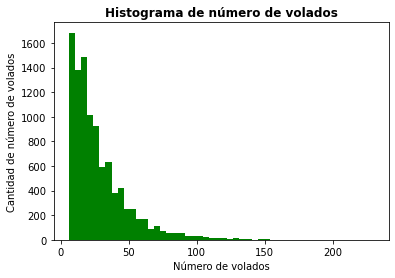

In [70]:
plt.hist(lista, bins = 50, color ='green')
plt.xlabel("Número de volados")
plt.ylabel("Cantidad de número de volados")
plt.title("Histograma de número de volados", fontweight ="bold")
plt.show()